In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [3]:
from os import path

In [4]:
history = subprocess.check_output(
    ['git', 'log', '--pretty=%aI', '--author=Gilles'], 
    cwd=path.expanduser('~/documents/websites/private.gillespilon.ca/'),
    universal_newlines=True).splitlines()

In [5]:
#history

In [6]:
from dateutil.parser import parse as parsedate
dates = list(map(parsedate, history))

In [7]:
df = pd.DataFrame.from_dict({'Date': dates},
                            dtype='datetime64[ns]') \
                 .set_index('Date')

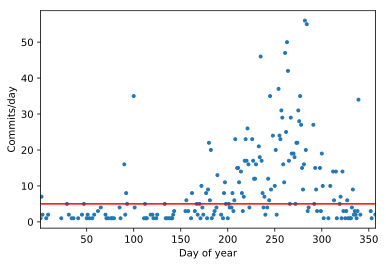

In [8]:
counts = df.reset_index() \
           .groupby(df.index.dayofyear) \
           .agg('count')
ax = counts.plot(style='.', legend=False)
ax.axhline(int(counts.median()), color='red')
ax.set_ylabel('Commits/day')
ax.set_xlabel('Day of year')

In [9]:
#counts = df.reset_index() \
#           .groupby(df.index.dayofweek) \
#           .agg('count')
#ax = counts.plot.bar(legend=False)
#ax.set_ylabel('Total commits per ')
#ax.set_xlabel('Day of week')

In [10]:
#counts = df.reset_index().groupby([df.index.weekofyear,
#                                   df.index.dayofweek]).agg('count')
#counts.index.set_names(['weekofyear', 'dayofweek'], inplace=True)
#counts.rename(columns={'Date': 'count'}, inplace=True)
#ax = counts.boxplot(by='dayofweek', grid=False)
#ax.set_xlabel('Day of week')
#ax.set_ylabel('Count')
#ax.set_title('')
#ax

In [11]:
#counts = df.reset_index() \
#           .groupby(df.index.hour) \
#           .agg('count')
#ax = counts.plot.bar(legend=False)
#ax.set_ylabel('Total commits by hour')
#ax.set_xlabel('Hour')

In [12]:
#counts = df.reset_index().groupby([df.index.date,
#                                   df.index.hour]).agg('count')
#counts.index.set_names(['date', 'hour'], inplace=True)
#counts.rename(columns={'Date': 'count'}, inplace=True)
#ax = counts.boxplot(by='hour', grid=False)
#ax.set_title('')
#ax.set_xlabel('Hour')
#ax.set_ylabel('Count')

In [13]:
df = pd.DataFrame.from_dict(
    [{'datetime': parsedate(aI), 'author': aN}
     for aI, aN
     in (line.split(maxsplit=1)
         for line
         in subprocess.check_output(['git', 'log', '--pretty=%aI %aN', '--no-merges'],
                                    universal_newlines=True)
                      .splitlines())]
)
df = df.astype({'datetime': 'datetime64[ns]'})
df['author'] = df['author'].map({
    'Gilles Pilon': 'Gilles'})
df.describe()

,author,datetime
count,92,92
unique,1,92
top,Gilles,2017-08-02 13:16:30
freq,92,1
first,NaN,2017-07-12 19:54:07
last,NaN,2017-10-12 16:14:54


In [14]:
#counts = df.groupby('author').agg('count')
#counts.rename(columns={'datetime': 'count'}, inplace=True)
#counts

In [15]:
#counts.describe()

In [16]:
#ax = counts.sort_index().plot.bar(y='count', logy=True, legend=False)
#ax.set_xlabel('Author')
#ax.set_ylabel('count(commits)')

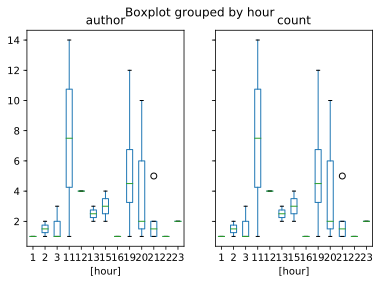

In [17]:
df = df.set_index('datetime')
counts = df.reset_index() \
           .groupby([df.index.date,
                     df.index.hour]) \
           .agg('count')
counts.index.set_names(['date', 'hour'], inplace=True)
counts.rename(columns={'datetime': 'count'}, inplace=True)
ax = counts.boxplot(by='hour', grid=False)
#ax.set_title('')
#ax.set_xlabel('Hour')
#ax.set_ylabel('Count')